# Assignment 4

<font color=darkblue>
    
In this assignment, you will predict credit card users churn. You have been tasked to help a bank predict who is likely to cancel their credit card by building and evaluating a classification model.

You will perform some EDA, followed by data prep, model building, and performance evaluation. You will then summarize your findings and select your best performing model.

1. Exploratory Data Analysis (EDA)
2. Data Preparation
3. Model Building
4. Performance Evaluation
5. Model Selection

Enter your code along with any comments for each question.


## Data Discovery

### Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners (1).csv


In [ ]:
churn = pd.read_csv("BankChurners.csv")

In [ ]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

### Data Overview

In [ ]:
# let's create a copy of the data
data = churn.copy()

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are no null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

- Education_Level has 15% missing values
- Marital_Status has 7% missing values

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

### Data Pre-Processing

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## EDA

### Customer_Age Distribution

Create a boxplot stacked on top of a density distribution plot for 'Customer_Age.'

In [ ]:
#Creating numerical columns
num_cols=['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

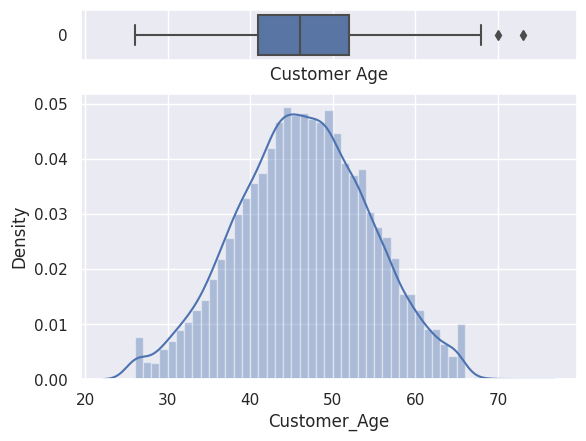

In [ ]:
# Cut the plot in half
f, (axis_box, axis_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(data["Customer_Age"], ax=axis_box, orient="h")
sns.distplot(data["Customer_Age"], ax=axis_hist)
axis_box.set(xlabel='Customer Age')

plt.show()

### Q1.1 Credit_Limit Distribution
Create a boxplot stacked on top of a density distribution plot for 'Credit_Limit.' Comment on what this chart indicates.

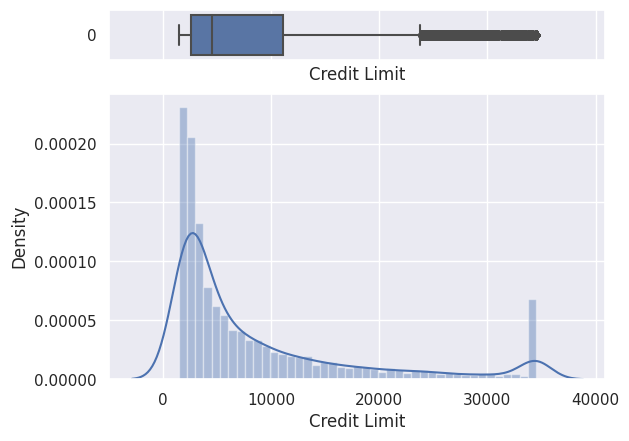

In [ ]:
# Dividing the plot in two sub sections
from seaborn.matrix import gridspec
f, (box_cred, dist_cred) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.15, 0.85)})

# Adding graph to the plots
sns.boxplot(data = data["Credit_Limit"], ax = box_cred, orient="h")
sns.distplot(data["Credit_Limit"], ax = dist_cred)

box_cred.set(xlabel = 'Credit Limit')
dist_cred.set(xlabel = 'Credit Limit')
plt.show()

This graph helps to visually analyze the distribution of the Credit Limit of customers, including its central tendencies, spread, and outliers. There are majority of customers having credit limit in 25% quartile.

### Q1.2 Total_Trans_Ct Distribution
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Ct.' Comment on what this chart indicates.

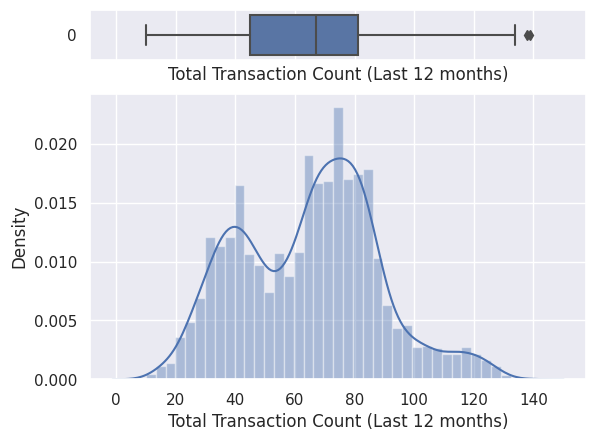

In [ ]:
# Dividing the plot in two sub sections

f, (box_trans, dist_trans) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.15, 0.85)})

# Adding graph to the plots
sns.boxplot(data = data["Total_Trans_Ct"], ax = box_trans, orient="h")
sns.distplot(data["Total_Trans_Ct"], ax = dist_trans)

box_trans.set(xlabel = 'Total Transaction Count (Last 12 months)')
dist_trans.set(xlabel = 'Total Transaction Count (Last 12 months)')
plt.show()

The density distribution of Total Transaction Counts in last 12 months indicates a normal distribution with two peaks and quartile 1 at 50 and quartile 3 at 85.

### Q1.3 Observations on Total_Trans_Amt
Create a boxplot stacked on top of a density distribution plot for 'Total_Trans_Amt.' Comment on what this chart indicates.

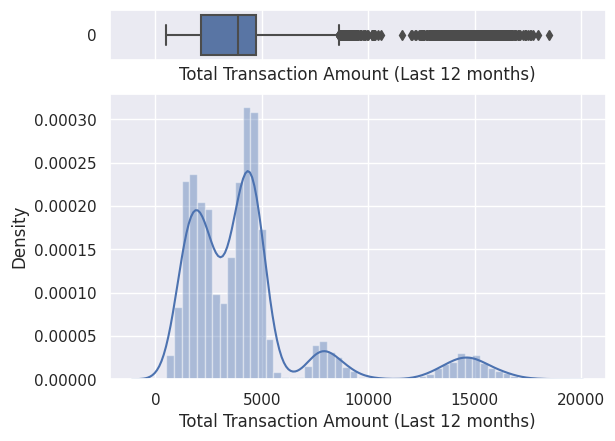

In [ ]:
# Dividing the plot in two sub sections

f, (box_trans_amt, dist_trans_amt) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (0.15, 0.85)})

# Adding graph to the plots
sns.boxplot(data = data["Total_Trans_Amt"], ax = box_trans_amt, orient="h")
sns.distplot(data["Total_Trans_Amt"], ax = dist_trans_amt)

box_trans_amt.set(xlabel = 'Total Transaction Amount (Last 12 months)')
dist_trans_amt.set(xlabel = 'Total Transaction Amount (Last 12 months)')
plt.show()

The density distribution of Total Transaction Amount in last 12 months also indicates a normal distribution with two peaks and quartile 1 at 50 and quartile 3 at 85.

### Q1.4 Correlation Matrix
Create a heatmap of the correlation matrix using spectral shading.

<Axes: >

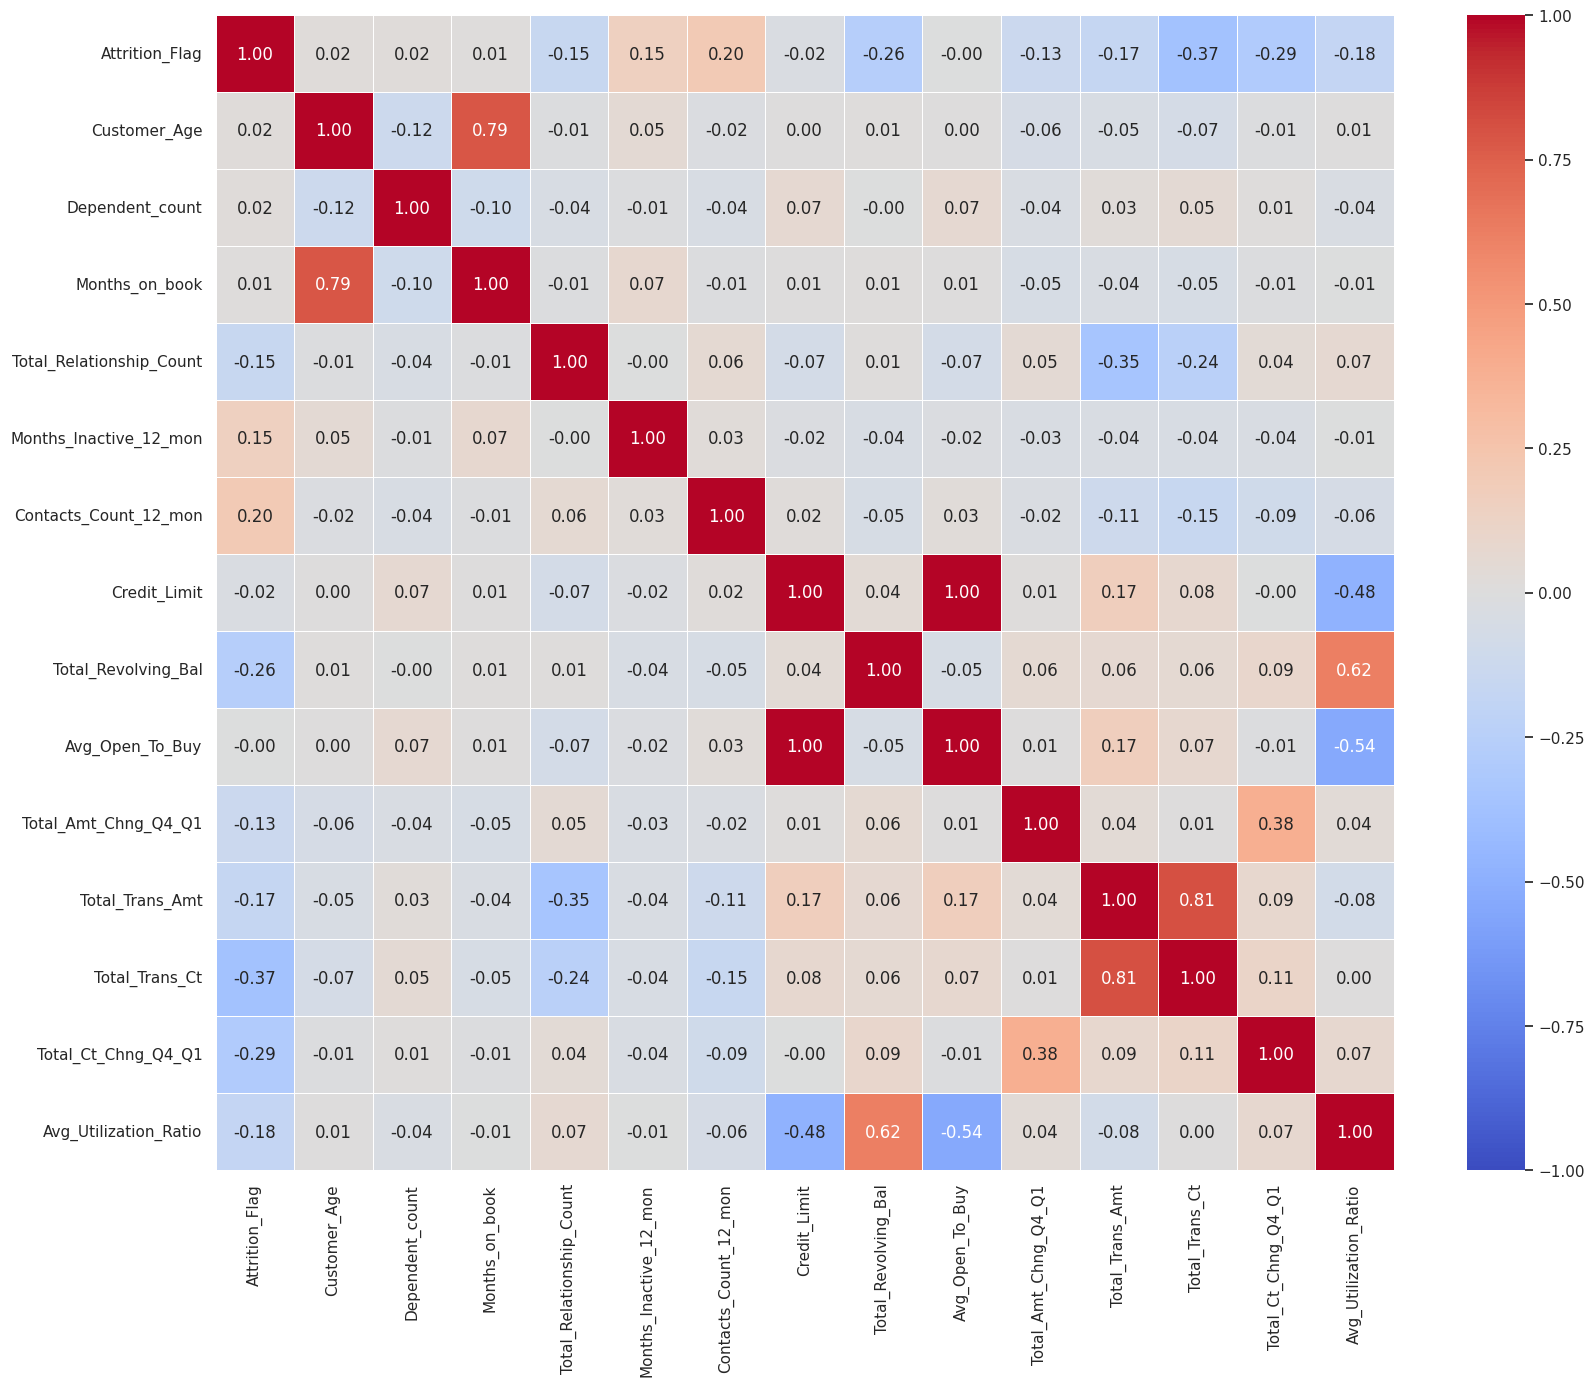

In [ ]:
f = plt.figure(figsize=(19, 15))

sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = +1, fmt = '.2f', cmap = "coolwarm", linewidths=0.5)

### Q1.5 Attrition_Flag vs Income_Category
Create barchart to visualize 'Income_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

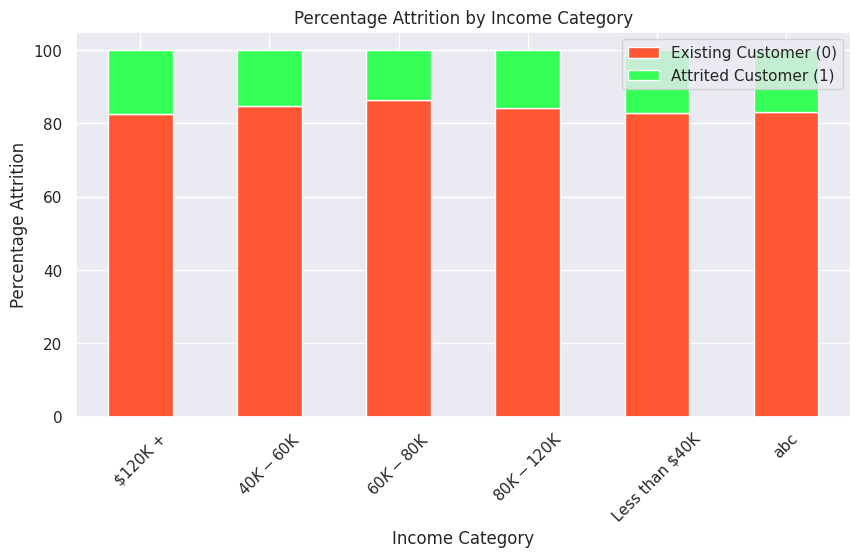

In [ ]:
# Grouping by 'Income_Category' & 'Attrition_Flag' and Reshape the data from long to wide format
attrition_percentage_inc_cat = data.groupby(['Income_Category', 'Attrition_Flag']).size().groupby(level=0).apply(lambda y: 100 * y / y.sum()).unstack()

# Create a stacked bar chart of the data
graph = attrition_percentage_inc_cat.plot(kind='bar', stacked=True, figsize=(10, 5), color = ['#FF5733', '#33FF57'])

# Setting x and y labels and title
graph.set_xlabel('Income Category')
graph.set_ylabel('Percentage Attrition')
graph.set_title('Percentage Attrition by Income Category')
graph.legend(['Existing Customer (0)', 'Attrited Customer (1)'], loc='upper right')
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

plt.show()

The percentage of attrition within each income category is shown on the chart.
It makes suggestions regarding whether income brackets have unusually high or low attrition rates.
You can determine if there is a correlation between income and customer attrition by looking at the attrition trend across various income categories.
Customers who make less and more money are more inclined to be attrited customers.





### Q1.6 Attrition_Flag vs Card_Category
Create barchart to visualize 'Card_Category' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

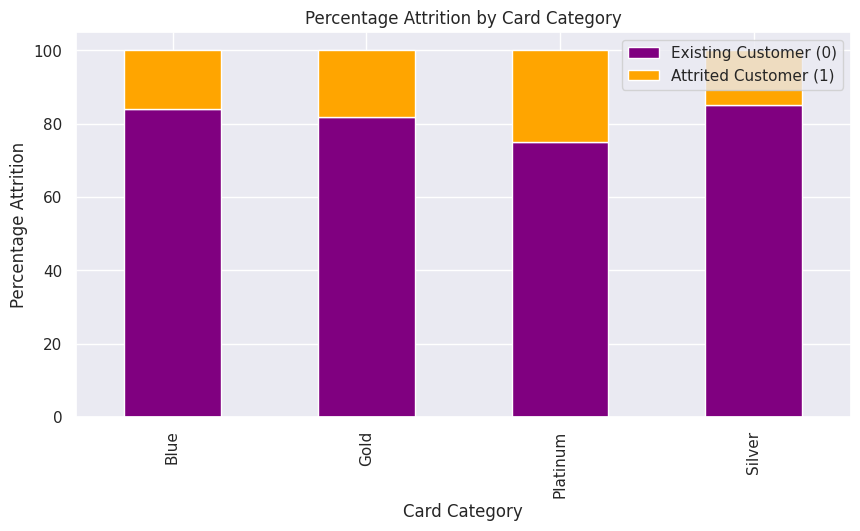

In [ ]:
# Grouping by 'Card_Category' & 'Attrition_Flag' and Reshape the data from long to wide format
attrition_percentage_card_cat = data.groupby(['Card_Category', 'Attrition_Flag']).size().groupby(level=0).apply(lambda y: 100 * y / y.sum()).unstack()

# Create a stacked bar chart of the data
graph = attrition_percentage_card_cat.plot(kind='bar', stacked=True, figsize=(10, 5), color = ['#800080', '#FFA500'])

# Setting x and y labels and title
graph.set_xlabel('Card Category')
graph.set_ylabel('Percentage Attrition')
graph.set_title('Percentage Attrition by Card Category')
graph.legend(['Existing Customer (0)', 'Attrited Customer (1)'], loc='upper right')

plt.show()

 The highest attrition rate among the various card types, up to 25%, is experienced by platinum cardholders. This implies that a sizeable percentage of consumers who have platinum cards are more likely to churn to other services. In order to lower overall customer attrition and ensure customer loyalty, it may be crucial to create tailored retention measures and understand the causes of the higher attrition rate among platinum cardholders.

### Q1.7 Attrition_Flag vs Months_Inactive_12_mon
Create barchart to visualize 'Months_Inactive_12_mon' on the x-axis and the percentage attrition in the y-axis. Shade by whether or not the customer attrites. Comment on what this chart indicates.

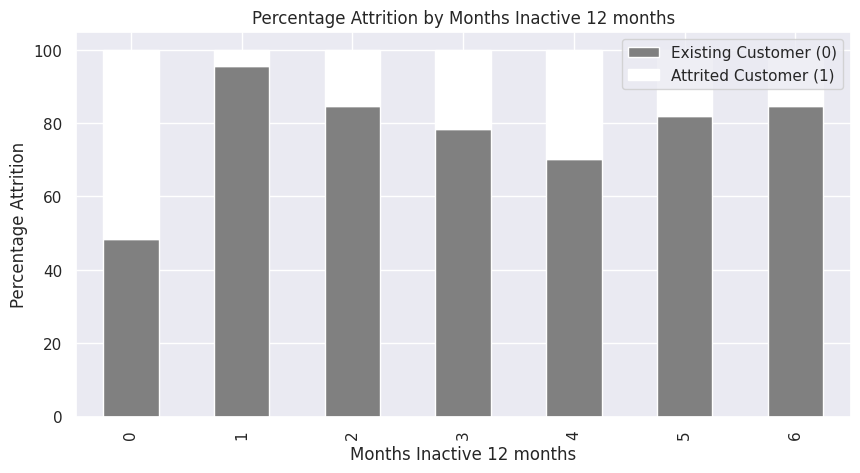

In [ ]:
# Grouping by 'Months_Inactive_12_mon' & 'Attrition_Flag' and Reshape the data from long to wide format
attrition_percentage_mon_inact = data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).size().groupby(level=0).apply(lambda y: 100 * y / y.sum()).unstack()

# Create a stacked bar chart of the data
graph = attrition_percentage_mon_inact.plot(kind='bar', stacked=True, figsize=(10, 5), color = ['#808080', '#FFFFFF'])

# Setting x and y labels and title
graph.set_xlabel('Months Inactive 12 months')
graph.set_ylabel('Percentage Attrition')
graph.set_title('Percentage Attrition by Months Inactive 12 months')
graph.legend(['Existing Customer (0)', 'Attrited Customer (1)'], loc='upper right')

plt.show()

Insights can be gained by examining the % attrition depending on the number of inactive months over the previous 12 months. The highest attrition rate, which is 30%, is seen among customers who have not purchased anything for four months during the past year. This shows that clients who have been inactive for four months are more likely to end the relationship. Customers who have been inactive for 3 months exhibit a lower attrition rate than those who have been inactive for 5 months, who fall somewhere in the middle.

## Data Preparation

### Outlier Analysis

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.06596
Customer_Age                0.01975
Dependent_count             0.00000
Months_on_book              3.81159
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      3.26849
Contacts_Count_12_mon       6.21112
Credit_Limit                9.71660
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             9.50923
Total_Amt_Chng_Q4_Q1        3.91034
Total_Trans_Amt             8.84764
Total_Trans_Ct              0.01975
Total_Ct_Chng_Q4_Q1         3.89059
Avg_Utilization_Ratio       0.00000
dtype: float64

### Missing Value Imputation
- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [ ]:
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Values have been replaced.

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3247
High School      1425
Uneducated       1031
College           709
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3815
Single      2771
Divorced     502
Name: Marital_Status, dtype: int64
******************************
Less than $40K    3273
$40K - $60K       1254
$80K - $120K      1084
$60K - $80K        974
$120K +            503
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


### Encoding Categorical Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


* After encoding there are 29 columns.

In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.00000,0,7985.00000,1.03200,3873,72,0.67400,0.00000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4686,50,0,36,3,3,2,5444.00000,2499,2945.00000,0.46800,4509,80,0.66700,0.45900,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1276,26,0,13,6,3,4,1643.00000,1101,542.00000,0.71300,2152,50,0.47100,0.67000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
6119,65,0,55,3,3,0,2022.00000,0,2022.00000,0.57900,4623,65,0.54800,0.00000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2253,46,3,35,6,3,4,4930.00000,0,4930.00000,1.01900,3343,77,0.63800,0.00000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


## Model Building

### Q2.1 Model Evaluation Criterion
What 2 cases of predictions can the model predict incorrectly? Which case is more important? What does this mean for recall and false negatives (increasing or decreasing)?

Two instances of inaccurate forecasts made by a customer attrition predictive model are as follows:

False Positives: In this situation, the model predicts that a customer would leave the company (attrite), but in actuality, the consumer stays on as an existing client.

False Negatives: On the other hand, a false negative occurs when a customer is predicted to remain a current customer by the model, but the customer actually churns.

False Negatives is usually the more significant of these two occurrences. This is due to the possibility of revenue loss and decreased customer retention when the model mistakenly forecasts that a client would stay (false negative), yet the customer actually departs. It implies that clients who were at risk of leaving have stayed.

### Q2.2 Logistic Regression
Train a logistic regression model using all predictors.

In [ ]:
# Convert features to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=1)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Q2.3 Evaluation Metrics
Create a function to calculate and print the classification report and confusion matrix.

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)

    # Calculating confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Extract True Positives, True Negatives, False Positives, and False Negatives
    tp, tn, fp, fn = conf_matrix.ravel()

    # Calculate additional classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the Confusion Matrix and other metrics
    print("Confusion Matrix:\n", conf_matrix)

    print('False Positive:', fp)
    print('False Negative:', fn)
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

### Q2.4 Check Performance on Training Data
Check the performance on your training data using the function you created. Comment on what your class of interest is, and how to read the confusion matrix.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088

Confusion Matrix:
 [[5726  223]
 [ 642  497]]
False Positive: 642
False Negative: 497
True Positive: 5726
True Negative: 223
Accuracy: 0.8779627539503386
Precision: 0.6902777777777778
Recall: 0.4363476733977173
F1 Score: 0.5346960731576117


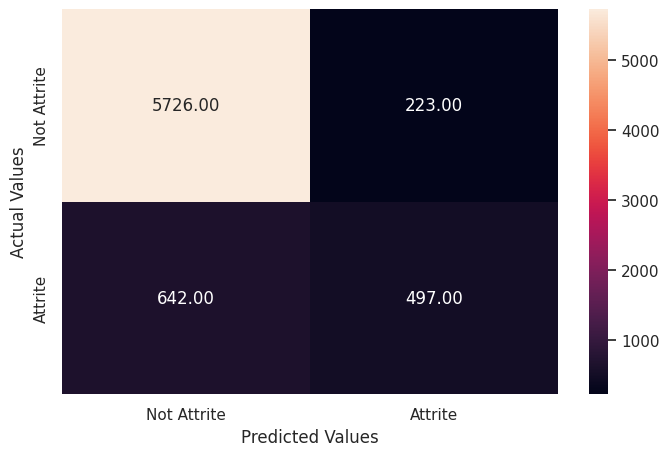

In [ ]:
evaluate_model(logistic_model, X_train, y_train)

Within a dataset, the logistic regression model has demonstrated good results in forecasting customer attrition. With an accuracy rate of 88%, the categorization report sheds light on the model's performance. The class of interest has an accuracy of 69%, representing attrition (1) and non-attrition (0). This indicates that about 69% of the attrition cases projected were accurate. The recall, which measures how well the model captures actual attritions, is just 44%, showing that there is room for improvement in terms of finding more attrition cases. The 0.53 F1-score indicates a balanced trade-off between recall and precision. Strategies to increase recall, such as modifying classification criteria or investigating various modeling approaches, might be taken into consideration to improve the model's performance.

### Q2.5 Check Performance on Test Data
Check the performance on your test data using the function you created.

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039

Confusion Matrix:
 [[2460   91]
 [ 274  214]]
False Positive: 274
False Negative: 214
True Positive: 2460
True Negative: 91
Accuracy: 0.8798947022046726
Precision: 0.7016393442622951
Recall: 0.4385245901639344
F1 Score: 0.5397225725094578


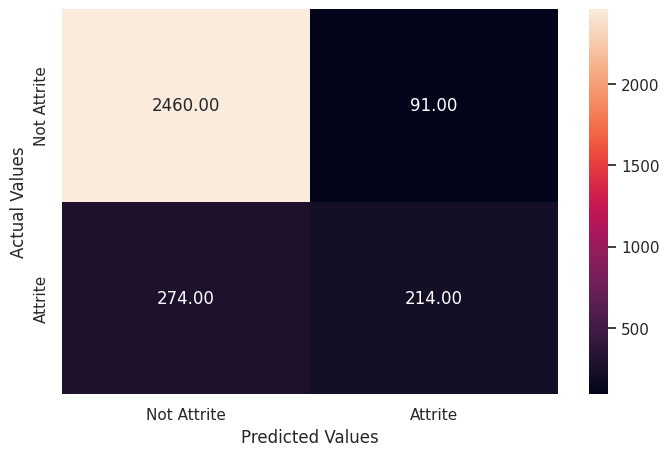

In [ ]:
evaluate_model(logistic_model, X_test, y_test)

### Q2.6 Comments on Performance
Comment on the accuracy of your train and test dataset. What is the recall for this model? What does the recall indicate on the overall model performance? Does this model identify the majority of the customers who wiill attrite?


The model performs pretty consistently, with an accuracy of 88% on both the training and test datasets. To learn more about how well the model can pinpoint actual attrition situations, it is essential to examine the recall metric.

Recall for attrition (class 1) in the training dataset is 44%, indicating that the model correctly predicts 44% of the customers who will attrite. This is a bit lower, indicating that there is opportunity for improvement in terms of catching more actual attrition situations.

The recall for attrition (class 1) on the test dataset somewhat increases to 44%. This demonstrates consistency with the training dataset while also pointing to the model's continued ability to correctly predict about 44% of customers who will attrite.

The model has more room for development when it comes to accurately classifying clients who will not attrite, despite being rather accurate when doing so. Therefore, further model improvement or investigation of various modeling methodologies may aid in improving the recall and overall effectiveness of identifying attrition cases.

## Performance Evaluation

### Q3.1 Evaluate Predictors
Print the coefficients of the logistic regression and comment on which variables are leading to attrition.

In [ ]:
# Get the coefficients (weights) of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display coefficients along with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values in descending order to see the most influential variables
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the DataFrame
print(coefficients_df)


                           Feature  Coefficient
5            Contacts_Count_12_mon      0.31531
4           Months_Inactive_12_mon      0.24919
1                  Dependent_count      0.20002
0                     Customer_Age      0.11755
25  Income_Category_Less than $40K      0.05269
21           Marital_Status_Single      0.04579
16        Education_Level_Graduate      0.01085
18   Education_Level_Post-Graduate      0.00870
15       Education_Level_Doctorate      0.00737
19      Education_Level_Uneducated      0.00455
28            Card_Category_Silver      0.00365
26              Card_Category_Gold      0.00318
22     Income_Category_$40K - $60K      0.00264
27          Card_Category_Platinum      0.00175
13           Avg_Utilization_Ratio      0.00137
10                 Total_Trans_Amt      0.00038
8                  Avg_Open_To_Buy      0.00034
17     Education_Level_High School     -0.00032
6                     Credit_Limit     -0.00035
7              Total_Revolving_Bal     -

Positive coefficients show that greater values of the associated attribute increase the probability of attrition, whereas negative coefficients show that higher values decrease the probability of attrition.

Attrition-causing factors with a favorable impact:

Contacts_Count_12_Mon: Attrition is more likely to occur for customers who have interacted with the bank more frequently over the previous 12 months.
Months_Inactive_12_Mon: Longer periods of inactivity over the previous 12 months have been linked to higher attrition rates.
Dependent_count: Customers are more prone to face attrition if they have more dependents.
Customer_Age: There is a little increased risk of attrition for older customers.
Income_Category_Less than 40K: Customers that fall into the "Less than 40K" income category are more likely to leave their company.
Marital_Status_Single: Compared to other marital statuses, single customers are more likely to experience attrition.

### Q3.2 Odds Calculation
Convert the coefficients of the logistic regression model to odds. Comment on the odds of customer attrition when it comes to contacting the bank, being inactive, and being dependent.

In [ ]:
odds = np.exp(logistic_model.coef_[0])

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
Contacts_Count_12_mon,1.37069
Months_Inactive_12_mon,1.28299
Dependent_count,1.22143
Customer_Age,1.12474
Income_Category_Less than $40K,1.05410
Marital_Status_Single,1.04686
Education_Level_Graduate,1.01091
Education_Level_Post-Graduate,1.00874
Education_Level_Doctorate,1.00739
Education_Level_Uneducated,1.00456


The likelihood of a client departing is influenced by both the frequency of interactions over the previous year, which increases the likelihood of attrition, and the length of inactivity, which decreases the likelihood. Additionally, a rise in dependents is linked to a decreased likelihood of customer churn. According to these data, clients who have been actively interacting with the company and keeping in touch recently are less likely to depart, and clients who have more dependents are similarly less likely to churn.

### Q3.3 Precision-Recall Curve
Create a precision-recall curve for your logistic regression model.

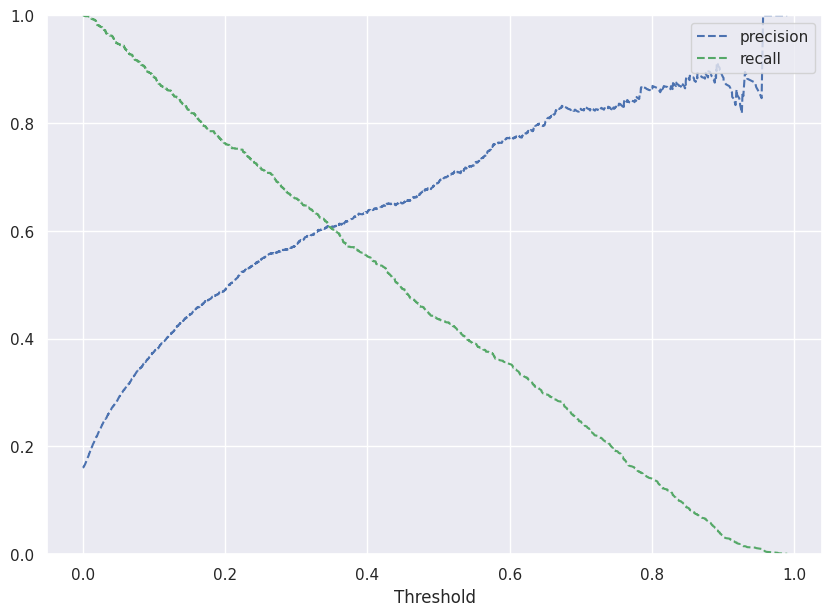

In [ ]:
y_scores_lg=logistic_model.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.show()


### Q3.4 Threshold Calculation
Calculate the threshold where precision and recall are equal.

In [ ]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.34806960434560535


### Q3.5 Re-Evaluate Performance on Training Data
Re-evaluate your model on the training data using the identified optimal threshold. Comment on the model performance.

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      5949
           1       1.00      0.63      0.77      1139

    accuracy                           0.94      7088
   macro avg       0.97      0.82      0.87      7088
weighted avg       0.94      0.94      0.94      7088

Confusion Matrix:
 [[5949    0]
 [ 419  720]]
False Positive: 419
False Negative: 720
True Positive: 5949
True Negative: 0
Accuracy: 0.9408860045146726
Precision: 1.0
Recall: 0.6321334503950834
F1 Score: 0.7746100053792361


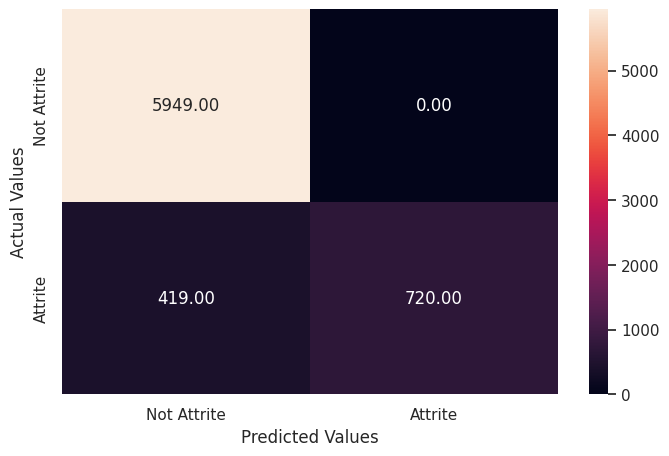

In [ ]:
import numpy as np

y_score_lg = logistic_model.predict_proba(X_train)[:, 1]
new_threshold = 0.34806960434560535
y_train_pred_threshold = (y_score_lg >= new_threshold).astype(int)
evaluate_model(logistic_model, X_train, y_train_pred_threshold)


After changing the threshold, the model's performance shows notable gains in recall while keeping a high degree of precision. With a recall of 0.63 and a precision of 1.00 for class 1 (attrition), this data shows that the model is now correctly identifying a sizable portion of consumers who are likely to attrite. The F1-score and accuracy have both improved, highlighting the model's general robustness.

The bulk of genuine positive predictions (720 out of 1139) in the confusion matrix show accurately detected attrition cases, while the number of incorrect negative predictions (419) is kept to a minimal. This indicates that the model is adept at identifying consumers who are likely to leave, making it successful in keeping high-risk clients.

The individual business objectives and trade-offs between recall and precision must be taken into account, though. The program excels at spotting possible attrition cases, but it occasionally produces false positives. This trade-off might be suitable depending on the resources and objectives of the company. As a result, the model now more closely matches the goal of keeping high-risk customers.

### Q3.6 Re-Evaluate Performance on Test Data
Re-evaluate your model on the test data using the identified optimal threshold. Comment on the model performance. How does the model's performance compare to the model prior to adjusting the threshold?

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2562
           1       1.00      0.64      0.78       477

    accuracy                           0.94      3039
   macro avg       0.97      0.82      0.87      3039
weighted avg       0.95      0.94      0.94      3039

Confusion Matrix:
 [[2562    0]
 [ 172  305]]
False Positive: 172
False Negative: 305
True Positive: 2562
True Negative: 0
Accuracy: 0.943402435011517
Precision: 1.0
Recall: 0.639412997903564
F1 Score: 0.7800511508951408


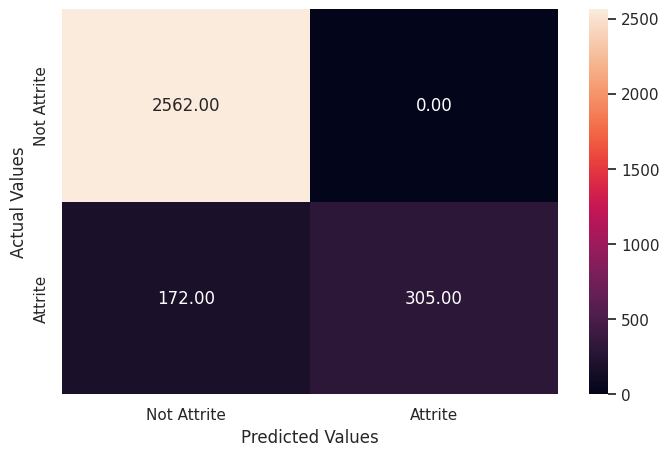

In [ ]:
y_scores_test = logistic_model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.34806960434560535
y_test_pred_threshold = (y_scores_test >= optimal_threshold).astype(int)
evaluate_model(logistic_model, X_test, y_test_pred_threshold)


Using the determined optimal threshold, the model's performance on the test data is still remarkable. With a score of 1.00 for class 1 (attrition), it demonstrates a high level of precision while obtaining a respectable recall of 0.64. This means that while reducing false positives, the algorithm is still reliably identifying a sizeable portion of consumers who are likely to attire. The robustness of the model's accuracy, F1-score, and overall performance demonstrates how well it can identify high-risk clients.

According to the confusion matrix, a significant portion of true positives (305 out of 477) indicate successfully recognized attrition cases, while the number of false negatives is significantly reduced (172). This indicates the model's sensitivity to consumers who are likely to leave, helping the business achieve its goal of keeping high-risk clients.

When comparing the performance of this model to that of the model used before raising the threshold, we notice a steady pattern of rising recall while preserving high precision. This is important in terms of customer retention since it enables the company to pinpoint consumers who are at danger of leaving and develop proactive and more successful customer retention efforts.